# Unemployment Analysis With Python

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

# Importing Dataset

In [48]:
df=pd.read_excel("Unemployment_Rate_upto_11_2020.xlsx")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# Exploratory Data Analysis

In [49]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [50]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64

In [51]:
df.sample(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
107,Jharkhand,30-09-2020,M,8.24,10185670,41.04,East,23.6102,85.2799
22,Bihar,31-03-2020,M,15.43,25717519,38.69,East,25.0961,85.3131
104,Jharkhand,30-06-2020,M,20.95,8622722,40.59,East,23.6102,85.2799


In [52]:
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                           int64
Estimated Labour Participation Rate (%)    float64
Region.1                                    object
Longitude                                  float64
Latitude                                   float64
dtype: object

In [53]:
#Missing Values
df.isnull().sum()/df.shape[0]*100

Region                                     0.0
Date                                       0.0
Frequency                                  0.0
Estimated Unemployment Rate (%)            0.0
Estimated Employed                         0.0
Estimated Labour Participation Rate (%)    0.0
Region.1                                   0.0
Longitude                                  0.0
Latitude                                   0.0
dtype: float64

In [54]:
for i in df.columns:
    print(".....................",i,".........................")
    print()
    print(set(df[i].tolist()))
    print()

..................... Region .........................

{'Sikkim', 'West Bengal', 'Andhra Pradesh', 'Jammu & Kashmir', 'Uttar Pradesh', 'Puducherry', 'Karnataka', 'Madhya Pradesh', 'Delhi', 'Haryana', 'Gujarat', 'Telangana', 'Chhattisgarh', 'Himachal Pradesh', 'Jharkhand', 'Goa', 'Maharashtra', 'Meghalaya', 'Tripura', 'Odisha', 'Assam', 'Tamil Nadu', 'Bihar', 'Punjab', 'Uttarakhand', 'Rajasthan', 'Kerala'}

..................... Date .........................

{'31-03-2020', '31-10-2020', '30-09-2020', '31-07-2020', '30-04-2020', '29-02-2020', '31-08-2020', '31-01-2020', '31-05-2020', '30-06-2020'}

..................... Frequency .........................

{'M'}

..................... Estimated Unemployment Rate (%) .........................

{0.5, 1.19, 1.96, 3.31, 4.66, 5.83, 5.79, 5.48, 8.34, 6.96, 6.4, 6.59, 4.41, 4.77, 11.06, 9.55, 10.61, 17.43, 10.29, 15.43, 20.51, 17.82, 13.44, 22.23, 17.04, 18.19, 20.3, 5.25, 21.25, 25.77, 25.05, 29.02, 26.7, 24.18, 33.5, 27.31, 29.84, 6.18, 3

In [55]:
df.duplicated().sum()

0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [57]:
df.describe(include="all")

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
count,267,267,267,267.000000,2.670000e+02,267.000000,267,267.000000,267.000000
unique,27,10,1,NaN,NaN,NaN,5,NaN,NaN
top,Andhra Pradesh,31-03-2020,M,NaN,NaN,NaN,North,NaN,NaN
freq,10,27,267,NaN,NaN,NaN,79,NaN,NaN
mean,NaN,NaN,NaN,12.236929,1.396211e+07,41.681573,NaN,22.826048,80.532425
std,NaN,NaN,NaN,10.803283,1.336632e+07,7.845419,NaN,6.270731,5.831738
min,NaN,NaN,NaN,0.500000,1.175420e+05,16.770000,NaN,10.850500,71.192400
25%,NaN,NaN,NaN,4.845000,2.838930e+06,37.265000,NaN,18.112400,76.085600
50%,NaN,NaN,NaN,9.650000,9.732417e+06,40.390000,NaN,23.610200,79.019300
75%,NaN,NaN,NaN,16.755000,2.187869e+07,44.055000,NaN,27.278400,85.279900


# Visualisation

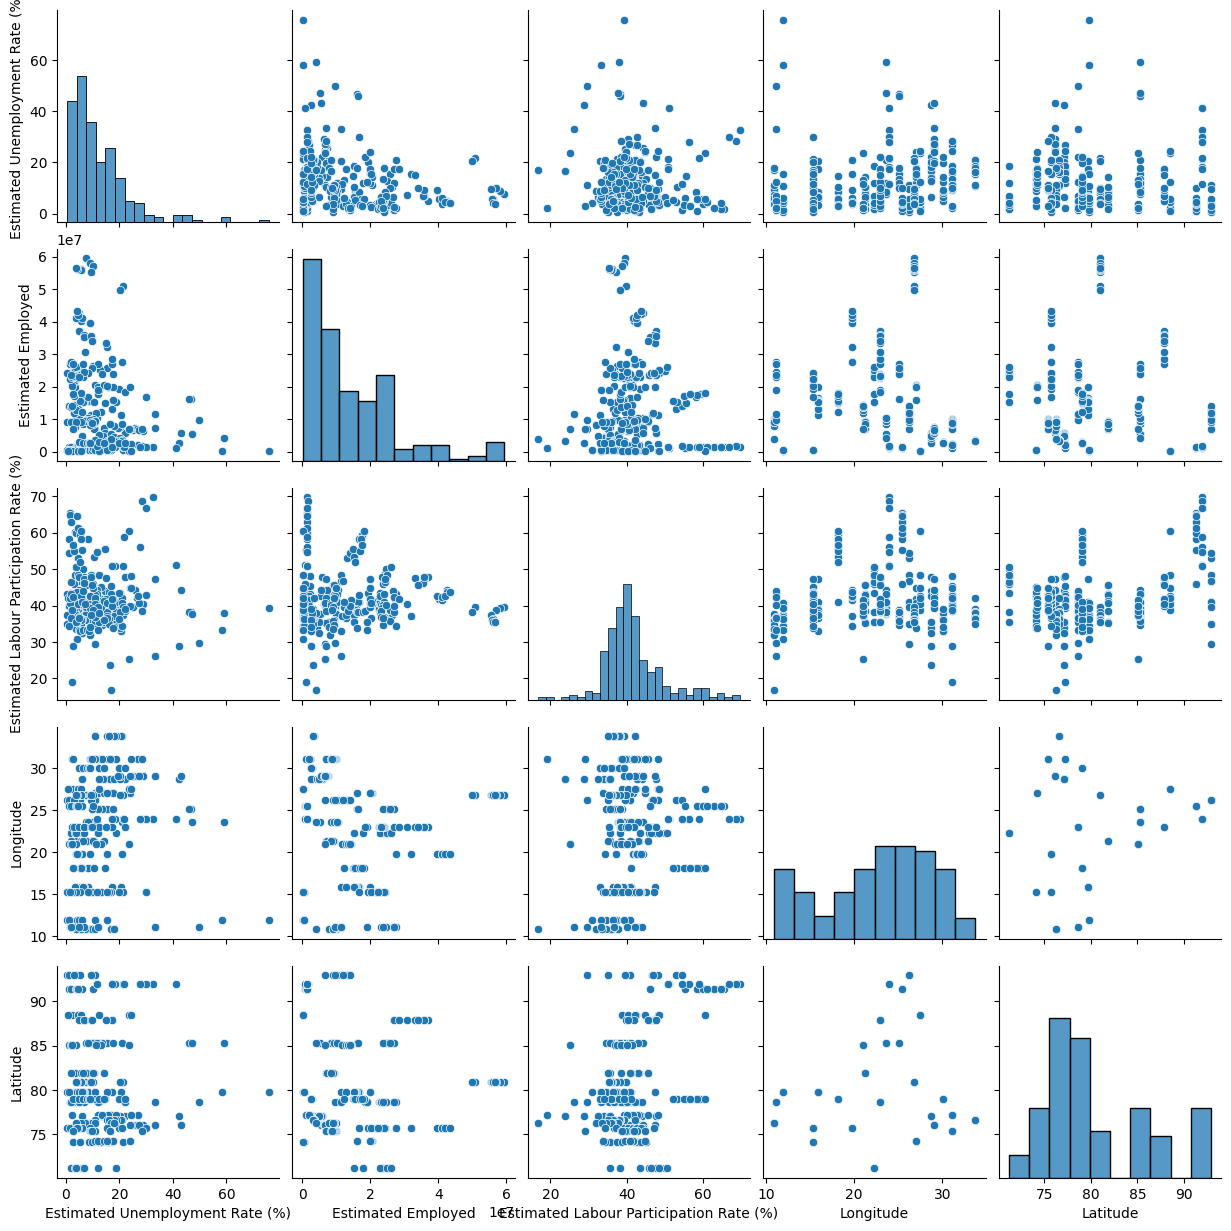

In [58]:
sns.pairplot(df)

C:\Users\User\AppData\Local\Temp\ipykernel_26220\778088545.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


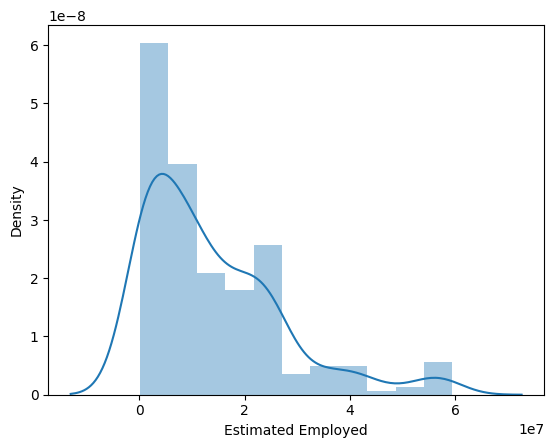

C:\Users\User\AppData\Local\Temp\ipykernel_26220\778088545.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


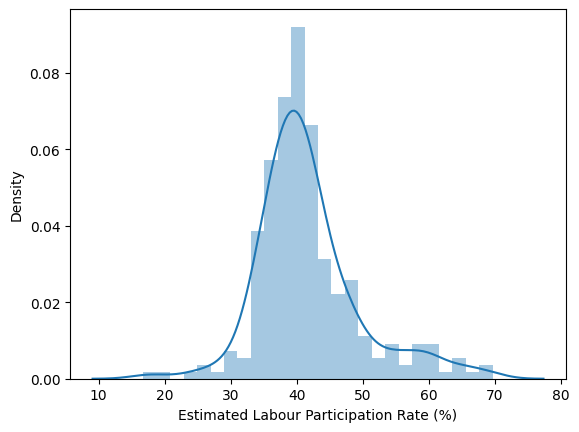

C:\Users\User\AppData\Local\Temp\ipykernel_26220\778088545.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


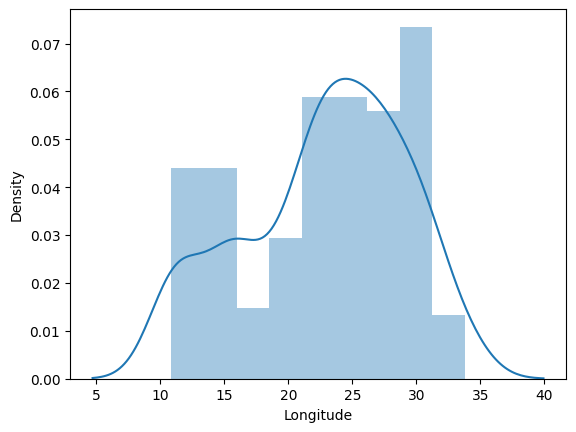

C:\Users\User\AppData\Local\Temp\ipykernel_26220\778088545.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


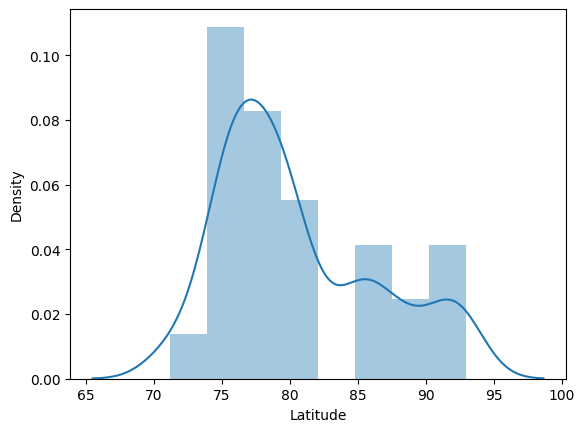

In [59]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

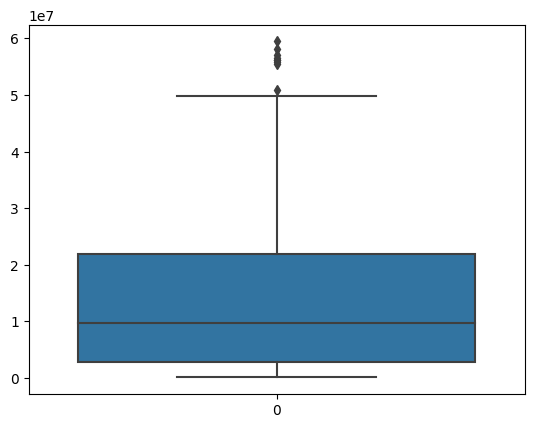

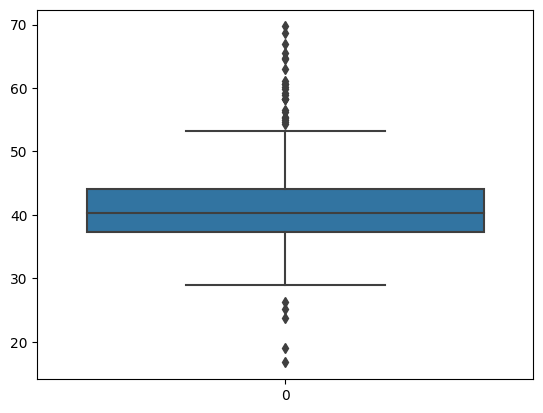

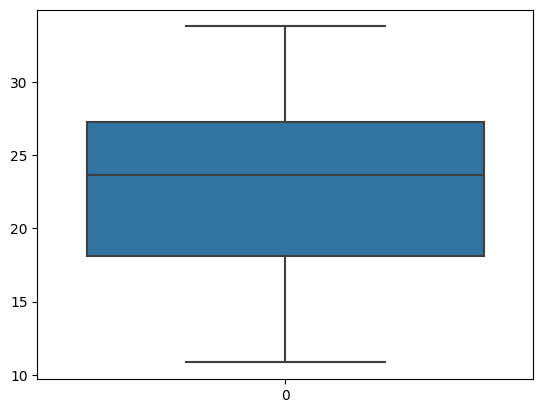

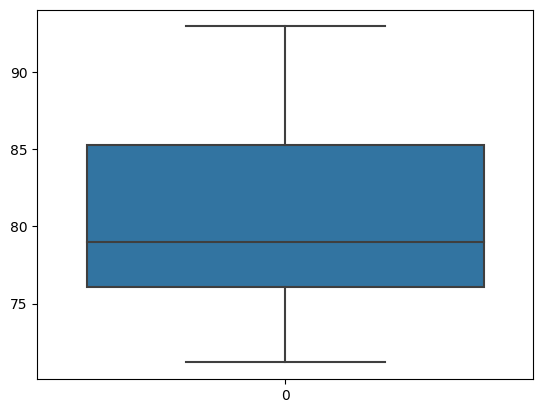

In [60]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

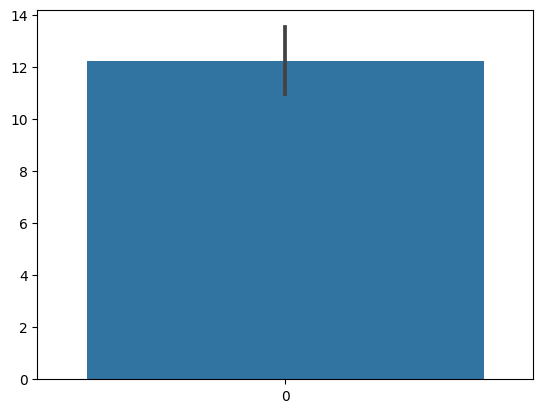

In [61]:
def bar(col):
    sns.barplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude=["object"]).columns)[:1]:
    bar(i)

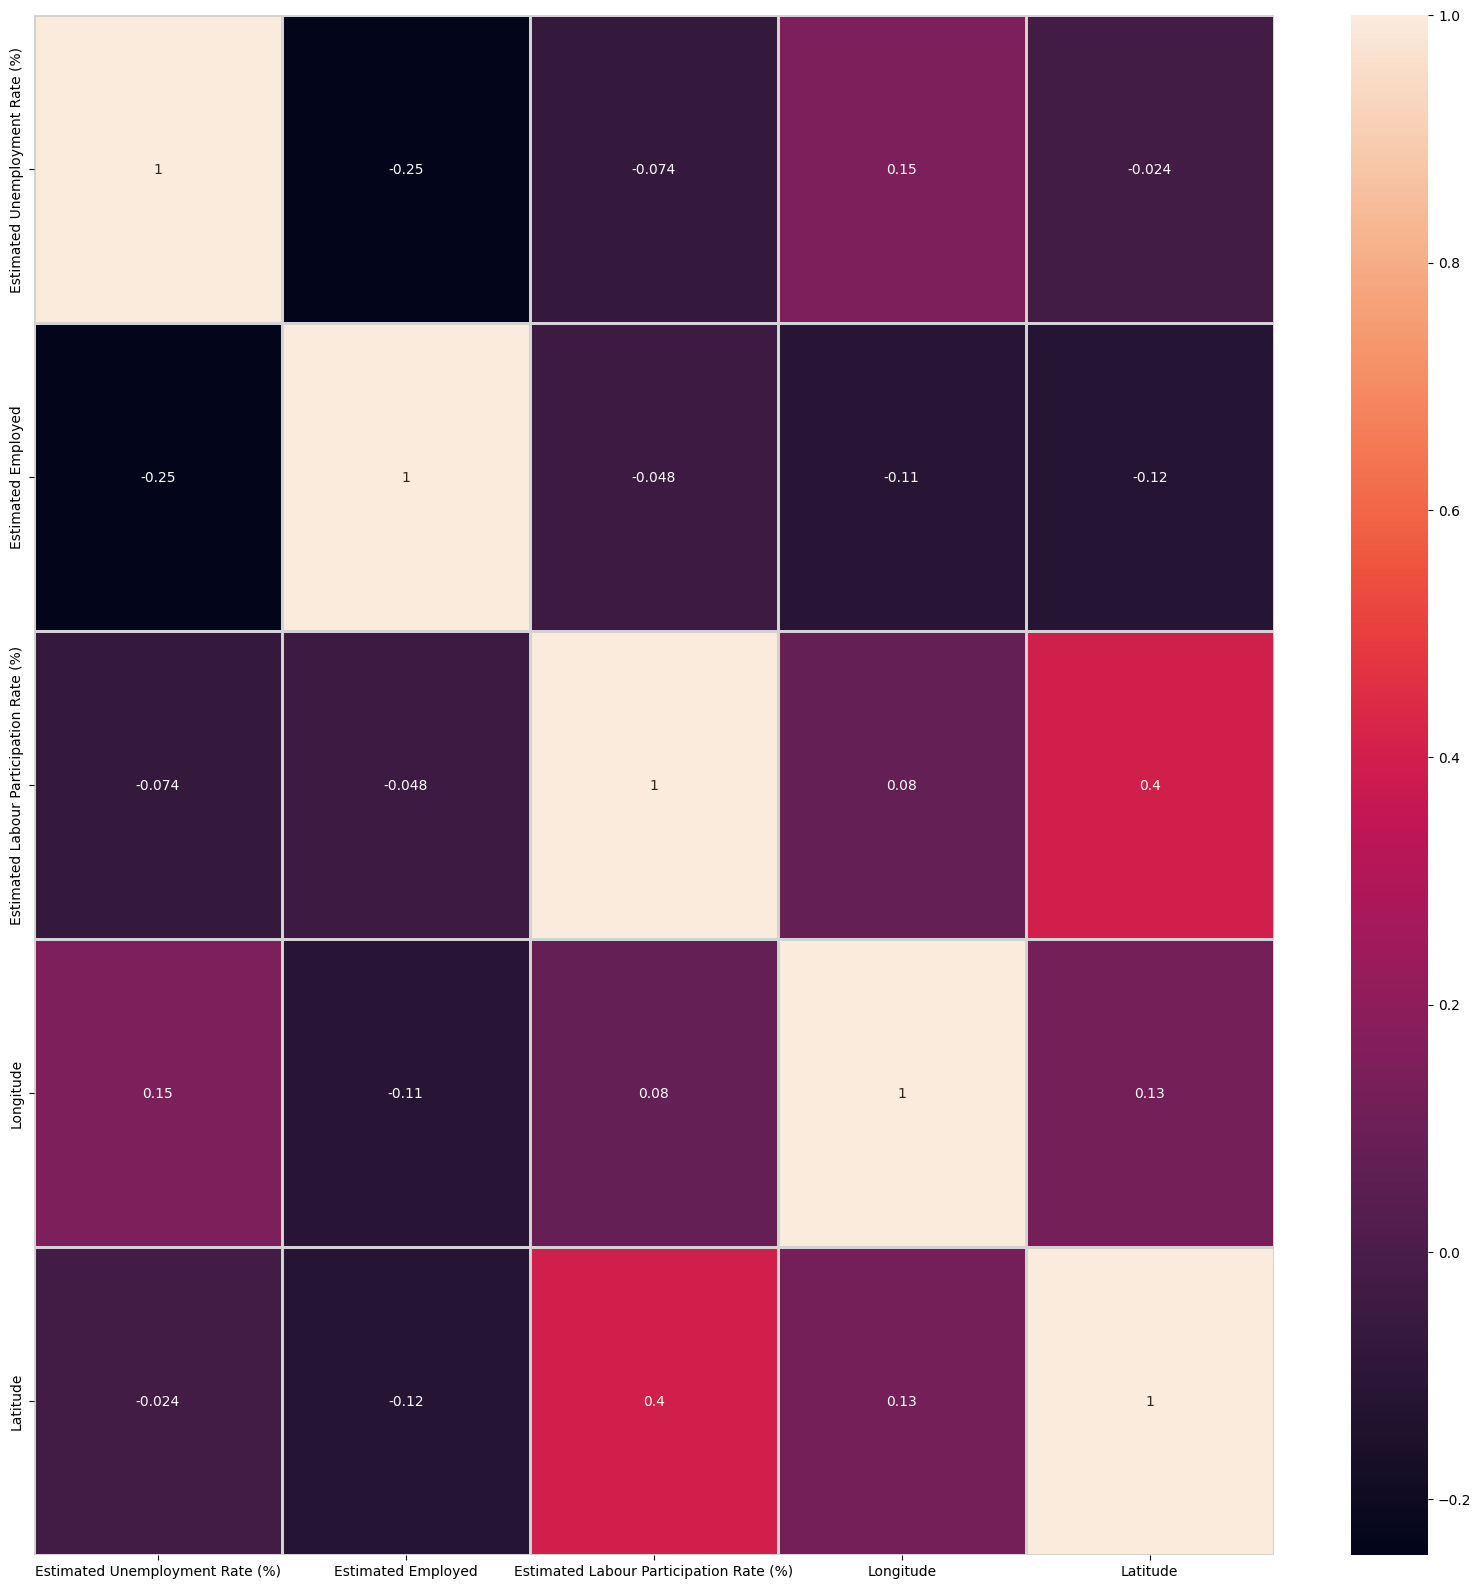

In [62]:
plt.figure(figsize = (20,20))

sns.heatmap(df.select_dtypes(exclude=["object"]).corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

# Estimated no of employee according to different region of india

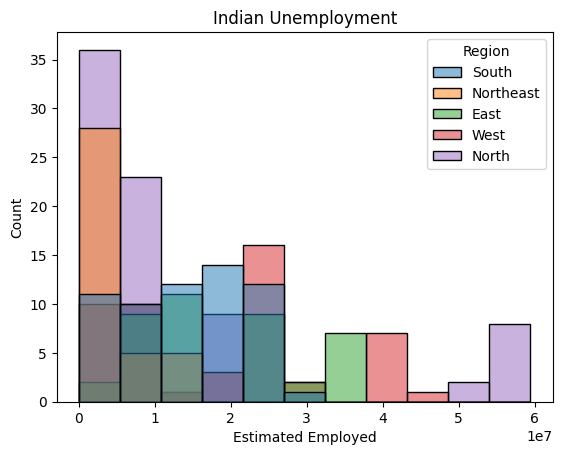

In [63]:
df.columns=['States','Date','Frequency','Estimated Unemployment Rate',
                'Estimated Employed','Estimated Labour Participation Rate',
                'Region','Longitude','Latitude']
plt.title('Indian Unemployment')
sns.histplot(x='Estimated Employed',hue='Region',data=df)
plt.show()

# Unemployment rate according to different regions of india

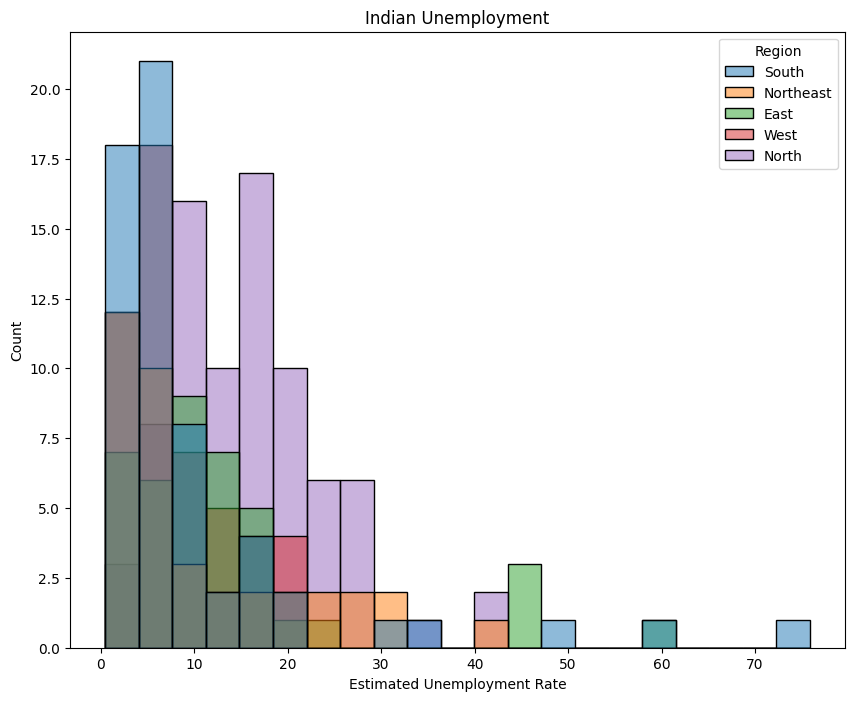

In [64]:
# plotting histplot

plt.figure(figsize=(10,8))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate",hue='Region',data=df)
plt.show()

# Dashboard to analyze the unemployment rate of each Indian state

In [65]:

unemployment = df[['States','Region','Estimated Unemployment Rate']]
figure = plx.sunburst(unemployment,path=['Region','States'],
                     values='Estimated Unemployment Rate',
                     width=700,height=600, color_continuous_scale='RdY1Gn',
                     title="Unemployment Rate in India")
figure.show()